In [106]:
import gym_bondgraph
import gymnasium as gym
from bond_graph import *
import numpy as np

%reload_ext autoreload
%autoreload 2

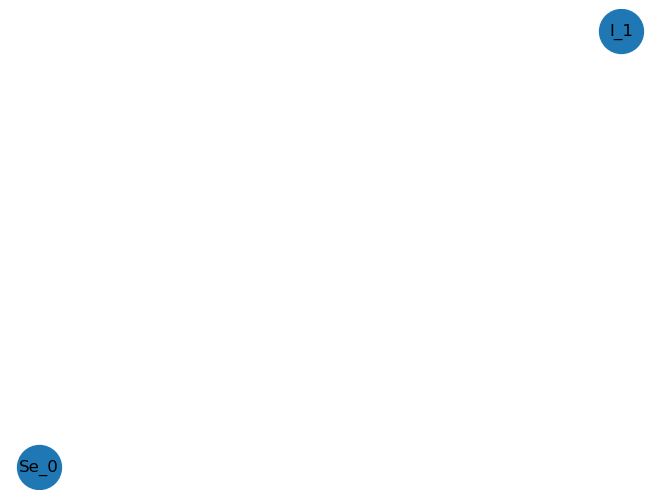

In [107]:
MAX_NODES = 10
MAX_STATES = 5

t_span = [0, 10]
time_array = np.linspace(t_span[0], t_span[1], 500)

s0 = BondGraph(max_nodes=MAX_NODES, max_states=MAX_STATES, time_array=time_array)
s0.add_element(EffortSource())
s0.add_element(Inertance(1))
# s0.add_bond(1, 0, 1)

labels = nx.get_node_attributes(s0.flow_causal_graph, 'element_label')
nx.draw(s0.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)


In [108]:
default_params = {
    'R': 1,
    'I': 1,
    'C': 1,
}
seed = np.random.randint(1,100)
# seed=420
env = gym.make('gym_bondgraph/BondGraphEnv-v4',  seed=None, seed_graph=s0, max_nodes=MAX_NODES, default_params=default_params)

In [109]:
env.reset()
# action = env.action_space.sample()
action = {
    'node_or_bond': 1, # 0 for add node, 1 for add edge
    "node_type": 1,
    "bond": [1, 0, 0], # 0 for negative bond sign, 1 for positive
    "node_param": 5
    }

causal_adjacency_mask, power_flow_adjacency_mask = env.bond_graph.get_bond_addition_mask()

print("Causal Adjacency Mask: \n", causal_adjacency_mask)
print()
print("Power Flow Adjacency Mask: \n", power_flow_adjacency_mask)
print()

print("Action: ", action)

observation, reward, terminated, na, info = env.step(action)

print("Observation: ", observation)
print("Reward: ", reward)
print("Terminated: ", reward)

Causal Adjacency Mask: 
 [[0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Power Flow Adjacency Mask: 
 [[0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 1]
 [0 1 1 0 1 1 1 1 1 1]
 [0 1 1 1 0 1 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1]
 [0 1 1 1 1 1 0 1 1 1]
 [0 1 1 1 1 1 1 0 1 1]
 [0 1 1 1 1 1 1 1 0 1]
 [0 1 1 1 1 1 1 1 1 0]]

Action:  {'node_or_bond': 1, 'node_type': 1, 'bond': [1, 0, 0], 'node_param': 5}
Observation:  {'node_type_space': array([1, 6, 0, 0, 0, 0, 0, 0, 0, 0]), 'node_param_space': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'adjacency_matrix_space': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

In [110]:
for _ in range(1000):
    action = env.action_space.sample()
    print("Action: ", action)

    observation, reward, terminated, terminated, info = env.step(action)
    print("Observation: ", observation)
    print("Reward: ", reward)
    
    print("Node Addition Mask: ", env.bond_graph.get_element_addition_mask())
    print("---------------------------------")
    


Action:  OrderedDict([('bond', array([2, 4, 0])), ('node_or_bond', 1), ('node_param', 5), ('node_type', 3)])
Observation:  {'node_type_space': array([1, 6, 0, 0, 0, 0, 0, 0, 0, 0]), 'node_param_space': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'adjacency_matrix_space': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)}
Reward:  -100
Node Addition Mask:  [1 1 1 1 1 1 1 1]
---------------------------------
Action:  OrderedDict([('bond', array([9, 9, 1])), ('node_or_bond', 1), ('node_param', 47), ('node_type', 5)])
Observation:  {'node_type_space': array([1, 6, 0, 0, 0, 0, 0, 0, 0, 0]), 'node_param_space': array([0., 1., 0., 0., 0., 0

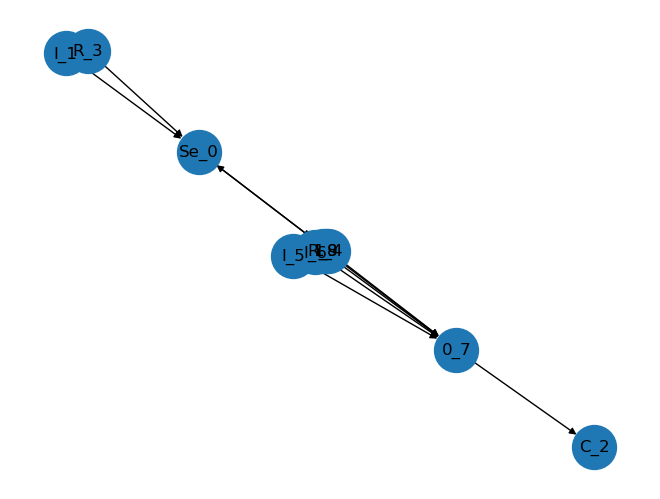

In [111]:
labels = nx.get_node_attributes(env.bond_graph.flow_causal_graph, 'element_label')
nx.draw_kamada_kawai(env.bond_graph.flow_causal_graph, labels=labels, with_labels=True, node_size=1000)